In [1]:
import skimage as sk 
from skimage import io 
from  matplotlib import pyplot as plt 
import numpy as np 
import cv2

In [2]:
def read_img(im_name, to_float=False):
    im = io.imread(im_name)
    if to_float:
        im = sk.img_as_float(im)
    return im.copy()

def normalize(im):
    return (im.copy()-im.min())/(im.max()-im.min()+1e-8)

In [3]:
"""Problem 1"""
"""(a)"""
def aMean4e(g, m, n):
    assert m%2 == 1, n%2 == 1
    padded_g = cv2.copyMakeBorder(g.copy(), m//2, m//2, n//2, n//2, cv2.BORDER_REFLECT)
    H, W = g.shape
    f = np.zeros(g.shape)
    for h in range(H):
        for w in range(W):
            f[h][w] = (padded_g[h:h+m, w:w+n].sum())/(m*n)
    return f

In [4]:
"""(b)"""
def geoMean4e(g, m, n):
    assert m%2 == 1, n%2 == 1
    padded_g = cv2.copyMakeBorder(g.copy(), m//2, m//2, n//2, n//2, cv2.BORDER_REFLECT)
    H, W = g.shape
    f = np.zeros(g.shape)
    for h in range(H):
        for w in range(W):
            f[h][w] = np.power(np.prod(padded_g[h:h+m, w:w+n]), 1/(m*n))
    return f

In [5]:
"""(c)"""
def harMean4e(g, m, n):
    assert m%2 == 1, n%2 == 1
    padded_g = cv2.copyMakeBorder(g.copy(), m//2, m//2, n//2, n//2, cv2.BORDER_REFLECT)
    H, W = g.shape
    f = np.zeros(g.shape)
    for h in range(H):
        for w in range(W):
            f[h][w] = (m*n)/(1/(padded_g[h:h+m, w:w+n]+1e-8)).sum()
    return f

In [30]:
"""(d)"""
def ctharMean4e(g, m, n, q):
    assert m%2 == 1, n%2 == 1
    padded_g = cv2.copyMakeBorder(g.copy(), m//2, m//2, n//2, n//2, cv2.BORDER_REFLECT)
    H, W = g.shape
    f = np.zeros(g.shape)
    for h in range(H):
        for w in range(W):
            f[h][w] = np.power(padded_g[h:h+m, w:w+n], q+1).sum()/(np.power(padded_g[h:h+m, w:w+n], q).sum()+1e-8)
    return f

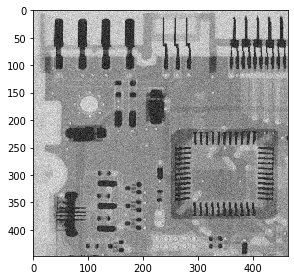

In [7]:
"""(e)"""
gaussian = read_img('./circuitboard-gaussian.tif', to_float=True)
io.imshow(gaussian)

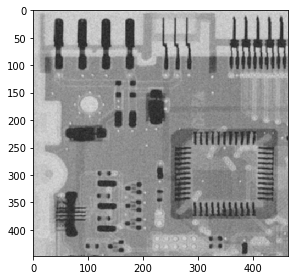

In [8]:
aMean_filtered = aMean4e(gaussian, 3, 3)
io.imshow(aMean_filtered, cmap='gray')

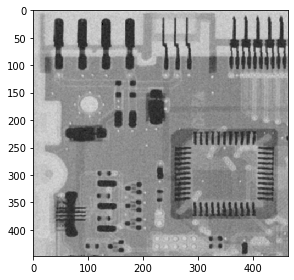

In [9]:
"""(f)"""
geoMean_filtered = geoMean4e(gaussian, 3, 3)
io.imshow(geoMean_filtered, cmap='gray')

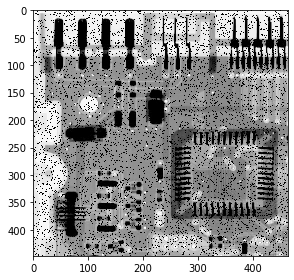

In [10]:
"""(g)"""
pepper = read_img('./circuitboard-pepper.tif', to_float=True)
io.imshow(pepper)

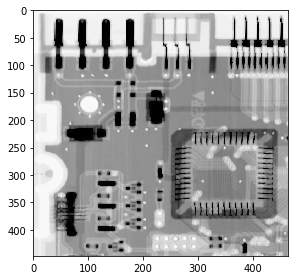

In [11]:
ctharMean_filtered = ctharMean4e(pepper, 3, 3, 1.5)
io.imshow(ctharMean_filtered, cmap='gray')

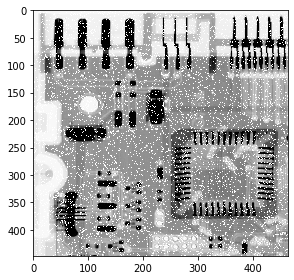

In [21]:
"""(h)"""
salt = read_img('./circuitboard-salt.tif', to_float=True)
io.imshow(salt)

/Users/vioichigo/opt/anaconda3/envs/mjrl-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


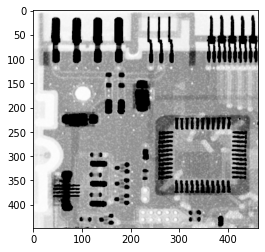

In [31]:
ctharMean_filtered = ctharMean4e(salt, 3, 3, -0.5)
plt.imshow(ctharMean_filtered, cmap='gray')

In [33]:
"""Problem 2"""
"""(a)"""
def sliding(g, m, n, op):
    assert m%2 == 1, n%2 == 1
    padded_g = cv2.copyMakeBorder(g.copy(), m//2, m//2, n//2, n//2, cv2.BORDER_REFLECT)
    H, W = g.shape
    f = np.zeros(g.shape)
    for h in range(H):
        for w in range(W):
            f[h][w] = op(padded_g[h:h+m, w:w+n])
    return f

In [34]:
"""(b)"""
def minFilter4e(g,m,n):
    return sliding(g, m, n, np.min)

In [35]:
"""(c)"""
def maxFilter4e(g,m,n):
    return sliding(g, m, n, np.max)

In [36]:
"""(d)"""
def medianFilter4e(g,m,n):
    return sliding(g, m, n, np.median)

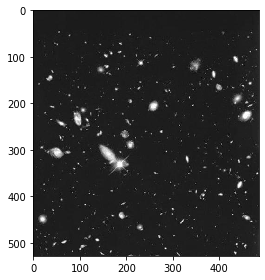

In [37]:
"""(e)"""
hubble = read_img('./hubble.tif', to_float=True)
io.imshow(hubble)

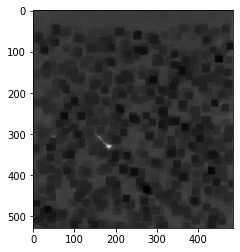

In [54]:
filtered = minFilter4e(hubble, 17, 17)
"""Not very sure if I should set a threshold here
   because otherwise it shows some black patches"""
# filtered = filtered * (filtered>0.2)
plt.imshow(filtered, cmap='gray')

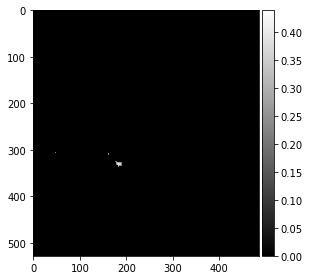

In [53]:
"""a cleanser version of the result"""
clean = filtered * (filtered>0.2)
io.imshow(clean, cmap='gray')

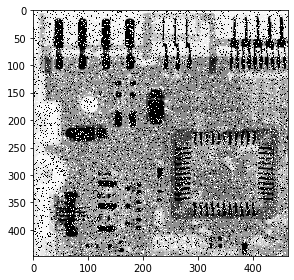

In [56]:
"""(f)"""
saltandpep = read_img('./circuitboard-saltandpep.tif', to_float=True)
io.imshow(saltandpep)

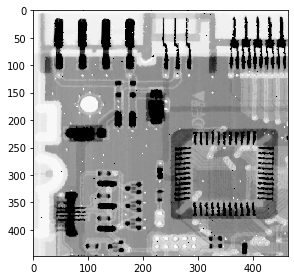

In [59]:
b = medianFilter4e(saltandpep.copy(), 3, 3)
io.imshow(b)

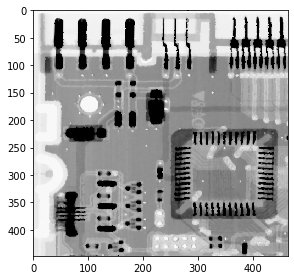

In [60]:
c = medianFilter4e(b.copy(), 3, 3)
io.imshow(c)

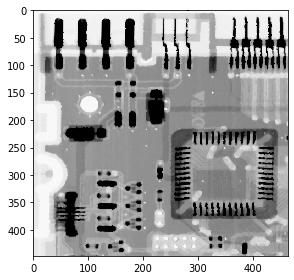

In [61]:
d = medianFilter4e(c.copy(), 3, 3)
io.imshow(d)